In [1]:
import pandas as pd

# Load the CSV file into a DataFrame
csv_file = '../10-10-2024_combined_distances_vanilla_256_512.csv'
df = pd.read_csv(csv_file)

# Show the first few rows to confirm the data is loaded correctly
print(df.head())


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                    pdb_file  shortest_ARG126-GLU52  shortest_ARG126-PHE59  \
0   model_2_ptm_r3_seed1.pdb                    5.0                   15.0   
1   model_3_ptm_r4_seed7.pdb                    4.4                   15.2   
2   model_4_ptm_r1_seed6.pdb                    5.0                   15.8   
3   model_5_ptm_r6_seed0.pdb                    3.5                   14.4   
4  model_5_ptm_r11_seed2.pdb                    3.5                   14.5   

   shortest_ARG126-GLU62  short

In [2]:
def analyze_distances(df, distance_dict):
    """
    Analyzes the specified distances in the DataFrame for the given aliases.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing distance data.
    distance_dict (dict): A dictionary where the key is an alias and the value is the column name in the CSV file.
    
    Returns:
    pd.DataFrame: A summary DataFrame with mean, std, min, max for each alias.
    """
    summary_data = []
    
    for alias, column_name in distance_dict.items():
        if column_name in df.columns:
            # Calculate statistics for the selected distances
            distances = df[column_name]
            summary = {
                'alias': alias,
                'mean': distances.mean(),
                'std': distances.std(),
                'min': distances.min(),
                'max': distances.max()
            }
            summary_data.append(summary)
        else:
            print(f"Warning: Column {column_name} not found in the DataFrame.")
    
    # Return the summary as a DataFrame
    summary_df = pd.DataFrame(summary_data)
    return summary_df


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_by_recycles(df, alias, column_name):
    """
    Plots the distribution of distances by recycle number based on the column name and alias provided.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing distance data.
    alias (str): The alias to label the plot.
    column_name (str): The column name from which to extract distances.
    
    Returns:
    None: Displays the plot.
    """
    if column_name not in df.columns:
        print(f"Error: Column {column_name} not found in the DataFrame.")
        return
    
    # Extract the recycle number from the pdb_file column (assuming _r<number> format)
    df['recycle'] = df['pdb_file'].apply(lambda x: int(x.split('_r')[1].split('_')[0]))
    
    # Filter out rows where the column has NaN values
    df_filtered = df[['recycle', column_name]].dropna()
    
    # Plot a violin plot for the distances by recycle number
    plt.figure(figsize=(12, 6))
    sns.violinplot(x='recycle', y=column_name, data=df_filtered, inner='box', cut=0)
    plt.title(f'Distribution of {alias} Distances by Recycle Number')
    plt.xlabel('Recycle Number')
    plt.ylabel('Distance (Å)')
    plt.grid(True)
    plt.show()


In [7]:
distance_dict = {
    'Alias1': 'shortest_ARG126-GLU52',
    'Alias2': 'CA_ARG126_CA-GLU52_CA'
}

summary_df = analyze_distances(df, distance_dict)
print(summary_df)


    alias       mean       std   min    max
0  Alias1   4.724615  0.793780  0.60   8.20
1  Alias2  10.430985  0.266448  9.25  11.02


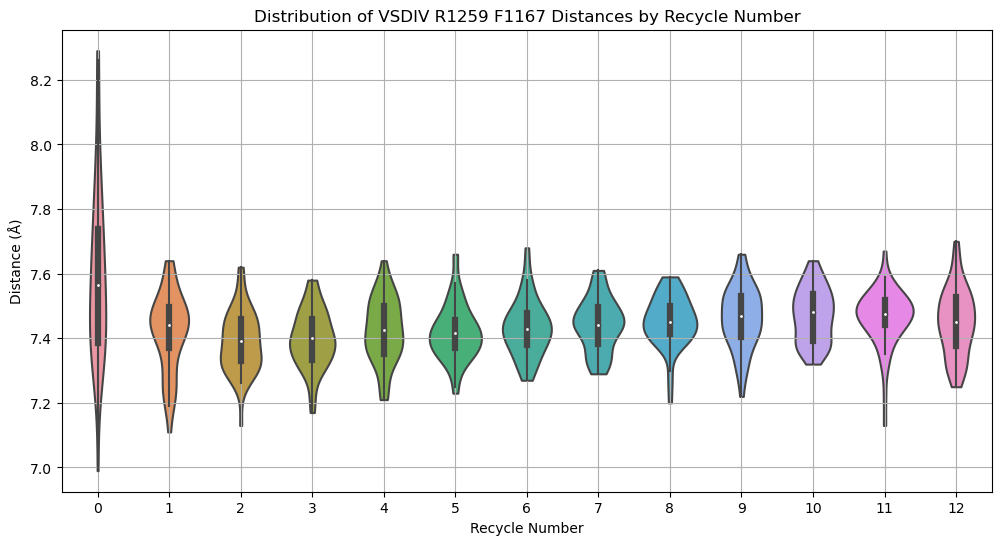

In [15]:
plot_by_recycles(df, 'VSDIV R1259 F1167', 'CA_GLU252_CA-GLU595_CA')
